In [21]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F

TRY1 타입 <class 'torch.Tensor'>
start
10000


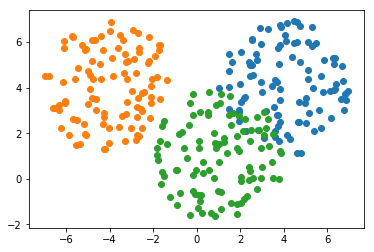

1.117466 , 3.7254467
2.386917 , -0.029644012
0.5633755 , 3.822359
3.7986488 , 0.01334095
-0.04834366 , 0.38069534
-1.8026218 , 1.0677261
3.2712002 , 2.607339
1.1415062 , -0.559248
0.6559925 , -1.4976158
2.9948177 , 0.5218477
-0.15568924 , -0.52895164
0.866457 , -1.6241531
0.26171494 , -1.4808922
3.878498 , 1.1218128
-1.6719275 , 1.6576691
0.85887337 , 1.5811558
1.0650558 , 3.3481674
-0.74095154 , -0.6028938
-1.8368082 , 1.3337193
-0.18297005 , 2.802866
1.955369 , 1.2274113
1.5885563 , 2.3563614
2.0476189 , 0.07675362
0.17074013 , 2.9421806
-0.08833313 , -0.6768532
3.3173084 , 1.4413223
-1.629694 , -0.21336174
0.10718918 , -0.7258034
-1.208107 , -0.7931242
-0.17127419 , 0.15184307
-1.3470116 , 1.5448694
1.8408031 , -1.5519905
1.5572376 , 3.6466513
0.88184357 , 3.2601385
1.8731937 , 1.3414059
0.07830238 , -1.2679119
0.31597424 , 0.24220657
2.9611158 , 1.3595238
-0.16121101 , 3.7031708
0.12846947 , 1.6691723
-0.9601307 , 0.36768913
2.0339613 , -0.08460903
-0.8280802 , 1.9496183
1.0056877 

In [56]:
#4,4일때

m2=24*torch.rand(10000,2)-12
#1,1일때
m4=24*torch.rand(10000,2)-12
#-4,4일때
m6=24*torch.rand(10000,2)-12

TRY1=torch.zeros(100,2)

print("TRY1 타입", type(TRY1.long()))
TRY2=torch.zeros(100,2)
TRY3=torch.zeros(100,2)

count=0
cnt=0
print("start")
print(len(m2))

while True:
    if(count==100):
        break
    if ((m2[cnt,0]-4)**2 + (m2[cnt,1]-4)**2)<=9:
        TRY1[count,0]=m2[cnt,0]
        TRY1[count,1]=m2[cnt,1]
        count=count+1
    cnt+=1
    
a=torch.Tensor.numpy(TRY1[:,0])
b=torch.Tensor.numpy(TRY1[:,1])

count=0
cnt=0
while True:
    if(count==100):
        break
    if ((m4[cnt,0]-(-4))**2 + (m4[cnt,1]-4)**2)<=9:
        TRY2[count,0]=m4[cnt,0]
        TRY2[count,1]=m4[cnt,1]
        count +=1
    cnt+=1

c=torch.Tensor.numpy(TRY2[:,0])
d=torch.Tensor.numpy(TRY2[:,1])

count=0
cnt=0
while True:
    if(count==100):
        break
    if ((m6[cnt,0]-1)**2 + (m6[cnt,1]-1)**2)<=9:
        TRY3[count,0]=m6[cnt,0]
        TRY3[count,1]=m6[cnt,1]
        count+=1
    cnt+=1


e=torch.Tensor.numpy(TRY3[:,0])
f=torch.Tensor.numpy(TRY3[:,1])

plt.scatter(a,b)
plt.scatter(c,d)
plt.scatter(e,f)
plt.show()

a_list=[];b_list=[];c_list=[]

for i in range(100):
    print(e[i],",",f[i])

e = torch.FloatTensor(e)
f = torch.FloatTensor(f)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device=='cuda':
    torch.cpu.manual_seed_all(777)


TRY1_Y = torch.ones(100,1)
TRY2_Y = torch.zeros(100,1)
TRY3_Y = torch.ones(100,1)
    
X=torch.cat([TRY1,TRY2],dim=0)
X=torch.cat([X,TRY3])
print(X.shape)
Y = torch.cat([TRY1_Y,TRY2_Y])
Y = torch.cat([Y,TRY3_Y])
print(Y.shape)

linear1 = torch.nn.Linear(2,3,bias=True)
linear2 = torch.nn.Linear(3,4,bias=True)
linear3 = torch.nn.Linear(4,2,bias=True)
linear4 = torch.nn.Linear(2,1,bias=True)
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid,linear3,sigmoid,linear4,sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for step in range(1001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step%100 == 0:
        print(step, cost.item())
       # for param in enumerate(model.parameters()):
           # print("가중치 : ",param)

    # Accuracy computation
    # True if hypothesis > 0.5 else False
    
with torch.no_grad():
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print('\nHypothesis: ',hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(),'\nAccuracy: ', accuracy.item())

X = torch.FloatTensor([[0,0],[0,1],[0.5,0.5],[1,1]])
print(model(X))

In [61]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device=='cuda':
    torch.cpu.manual_seed_all(777)


TRY1_Y = torch.ones(100,1).long()

print("타입: ",TRY1_Y)
print("타입: ",TRY1_Y.long())
TRY2_Y = torch.zeros(100,1).long()
TRY3_Y = (torch.ones(100,1)+1).long()


X=torch.cat([TRY1,TRY2],dim=0)
X=torch.cat([X,TRY3])
print(X.shape)
Y = torch.cat([TRY1_Y,TRY2_Y])
Y = torch.cat([Y,TRY3_Y])
print(Y.shape)

linear1 = torch.nn.Linear(2,3,bias=True)
linear2 = torch.nn.Linear(3,4,bias=True)
linear3 = torch.nn.Linear(4,2,bias=True)
linear4 = torch.nn.Linear(2,3,bias=True)
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid,linear3,sigmoid,linear4,sigmoid).to(device)

#criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

XX = np.arange(-6.5, 7.8, 1.3)
YY = np.arange(-6.5, 7.8, 1.3)
ZZ = np.zeros((11, 11))

XXX, YYY = np.meshgrid(XX, YY)

for step in range(100001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    #cost = criterion(hypothesis, Y)
    cost = F.cross_entropy(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step%1000 == 0:
        
        with torch.no_grad():
            for X_ in range(11):
                for Y_ in range(11):
                    ZZ[X_, Y_] = torch.Tensor.numpy(model(torch.from_numpy(np.array([XXX[X_, Y_], YYY[X_, Y_]], dtype='f'))))
                    print()
        print(step, cost.item())
        
        h= plt.contour(XX, YY, ZZ, colors='black', linestyles='dashed', linewidths=1)

        plt.clabel(h, inline=1, fontsize=10)
        h = plt.contourf(XX, YY, ZZ)
        plt.xlabel('X1')
        plt.xlabel('X2')
        plt.draw()
        
        #print(len(TRY1))
        plt.scatter(TRY1[:100,0], TRY1[:100,1], color='red')
        plt.scatter(TRY2[:100,0], TRY2[:100,1], color='blue')
        plt.scatter(TRY3[:100,0], TRY3[:100,1], color='green')
        plt.pause(0.1)
        plt.clf()
       # for param in enumerate(model.parameters()):
           # print("가중치 : ",param)

    # Accuracy computation
    # True if hypothesis > 0.5 else False

타입:  tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

RuntimeError: multi-target not supported at c:\n\pytorch_1559129895673\work\aten\src\thnn\generic/ClassNLLCriterion.c:21

# MNIST

NameError: name 'transforms' is not defined